<a href="https://colab.research.google.com/github/Sagar-modelling/Machine_Learning_Totorials/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ROOT = '/content/drive/MyDrive/perceptron python'

In [5]:
import os
os.chdir(ROOT)

In [3]:
!ls

models	perceptron.ipynb  test.txt


In [6]:
assert ROOT == os.getcwd()
os.getcwd()

'/content/drive/MyDrive/perceptron python'

In [7]:
with open('test.txt', "w") as f:
  f.writelines("Sagar Modelling")

## "Perceptron Implementation"

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib #for saving model as a binary file
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight") #style of graphs

In [9]:
class Perceptron:
  def __init__(self,lr,epochs):
    np.random.seed(42)
    self.weights = np.random.randn(3) * 10**-4
    print(f"intial weights brfore training: {self.weights}")
    self.lr = lr
    self.epochs = epochs    #self declares variable as global for all the methods

  def activationFunction(self,inputs,weights): 
    z = np.dot(inputs,weights)
    return np.where(z>0, 1,0)
  
  def fit(self, X, y):
    self.X = X 
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] #concatenation of X and bias 
    print(f"X with bias: {X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch}")
      print("--"*10)

      y_hat = self.activationFunction(X_with_bias, self.weights) #forward propogation
      print(f"prdicted value after forward pass: \n{y_hat}")
      self.error = self.y - y_hat
      print(f"error : \n{self.error}")
      self.weights = self.weights + self.lr * np.dot(X_with_bias.T, self.error) #backward propogation
      print(f"updated weights after epoch : \n{epoch}/{self.epochs} : \n{self.weights}")
      print("######"*10)

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss : {total_loss}")
    return total_loss


In [10]:
AND = {
      "x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y" : [0,0,0,1],

}
df = pd.DataFrame(AND)
df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [94]:
def prepare_data(df):
  X = df.drop("y", axis=1)

  y= df["y"]
  return X,y

In [12]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 4

model = Perceptron(lr=LR, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 
0/4 : 
[ 0.30004967  0.29998617 -0.29993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch : 
1/4 : 
[ 4.96714153e-05 -1.38264301e-05  6.00064769e-01]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 
2/4 : 
[0.30004967 0.29998617 0.30006477]
#####

In [13]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [14]:
y.values

array([0, 0, 0, 1])

In [15]:
inputs = np.array([[1,1],[0,0]])
model.predict(inputs)

array([1, 0])

In [16]:
def save_model(model,filename):
  model_dir  = "models"
  os.makedirs(model_dir, exist_ok=True)
  filepath = os.path.join(model_dir, filename)#models/filename
  joblib.dump(model, filepath) 

In [17]:
save_model(model, "and.model")

In [18]:
loaded_model = joblib.load('/content/drive/MyDrive/perceptron python/models/and.model')
loaded_model.predict(inputs)

array([1, 0])

In [20]:
OR = {"x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y"  : [0,1,1,1]
}
df = pd.DataFrame(OR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [22]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 5

model_OR = Perceptron(lr=LR, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch : 
0/5 : 
[ 0.60004967  0.59998617 -0.89993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
1/5 : 
[ 0.60004967  0.59998617 -0.59993523]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
2/5 : 
[ 0.60004967  0.59998617 -0.29993523]
##############

In [23]:
XOR = {"x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y"  : [0,1,1,0]
}
df = pd.DataFrame(XOR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


XOR MODEL will always through an error while training the model independent of the epochs( NON LINEAR)

In [40]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 10

model_XOR = Perceptron(lr=LR, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch : 
0/10 : 
[ 0.60004967  0.59998617 -0.89993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
1/10 : 
[ 0.60004967  0.59998617 -0.59993523]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
2/10 : 
[ 0.60004967  0.59998617 -0.29993523]
###########

In [90]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):  #internal function
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color = "black", linestyle="--",linewidth = 1)
    plt.axvline(x=0, color = "black", linestyle="--",linewidth = 1)
    figure = plt.gcf() #get current figure
    figure.set_size_inches(10,8)

  def _plot_decision_region(X,y,classifier,resolution=0.02):  #internal function
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values #X as an array
    x1 = X[:,0]
    x2 = X[:,1]
    x1_min, x1_max = x1.min() - 1 , x1.max() + 1 #finding minimum and ,maximum value in the x1[0] and x2[1] column
    x2_min, x2_max = x2.min() - 1 , x2.max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha =0.2, cmap=cmap) #ALPHA DENOTES TRANSPARENCY
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()

  X,y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_region(X,y,model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True)
  plotpath = os.path.join(plot_dir, file_name)   #plots/filename
  plt.savefig(plotpath)


In [91]:
OR = {"x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y"  : [0,1,1,1]
}
df = pd.DataFrame(OR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [92]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 5

model_OR = Perceptron(lr=LR, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch : 
0/5 : 
[ 0.60004967  0.59998617 -0.89993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
1/5 : 
[ 0.60004967  0.59998617 -0.59993523]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch : 
2/5 : 
[ 0.60004967  0.59998617 -0.29993523]
##############

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


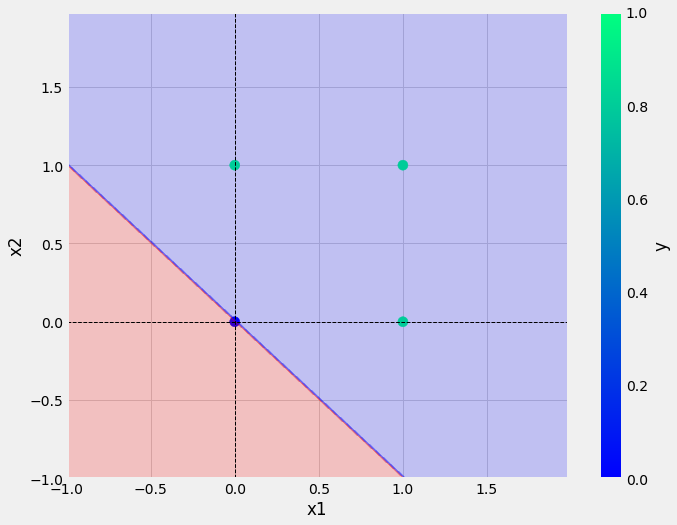

In [93]:
save_plot(df,"or.png",model_OR)

In [97]:
AND = {
      "x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y" : [0,0,0,1],

}
df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [98]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 5

model_AND = Perceptron(lr=LR, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 
0/5 : 
[ 0.30004967  0.29998617 -0.29993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch : 
1/5 : 
[ 4.96714153e-05 -1.38264301e-05  6.00064769e-01]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch : 
2/5 : 
[0.30004967 0.29998617 0.30006477]
#####

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


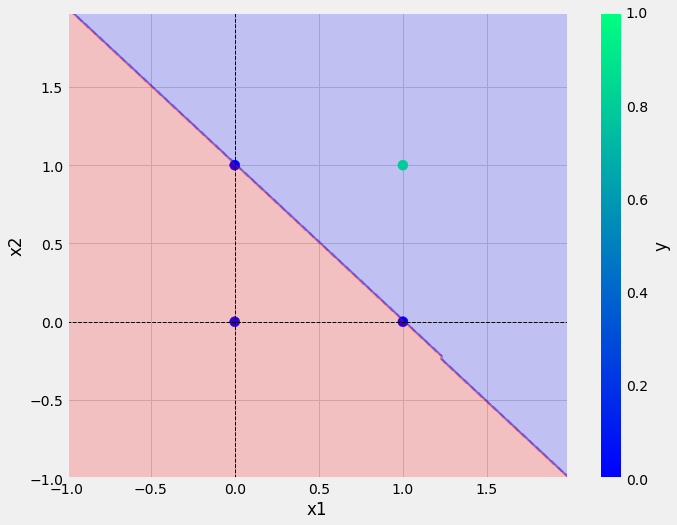

In [99]:
save_plot(df,"and.png",model_AND)

In [100]:
XOR = {"x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y"  : [0,1,1,0]
}
df = pd.DataFrame(XOR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [101]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 10

model_XOR = Perceptron(lr=LR, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch : 
0/10 : 
[ 0.30004967  0.29998617 -0.59993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 
1/10 : 
[ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch : 
2/10 : 
[ 0.30004967  0.29998617 -0.59993523]

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


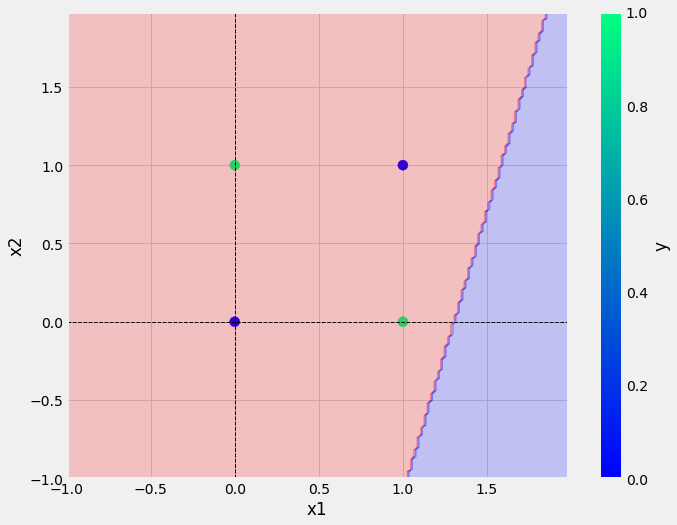

In [102]:
save_plot(df,"XOR.png",model_XOR)

In [104]:
NAND = {
      "x1" : [0,0,1,1],
      "x2" : [0,1,0,1],
      "y" : [1,1,1,0],

}
df = pd.DataFrame(NAND)

df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [105]:
X,y = prepare_data(df)

LR = 0.3
EPOCHS = 10

model_NAND = Perceptron(lr=LR, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()

intial weights brfore training: [ 4.96714153e-05 -1.38264301e-05  6.47688538e-05]
X with bias: [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
prdicted value after forward pass: 
[0 0 0 0]
error : 
0    1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch : 
0/10 : 
[ 0.30004967  0.29998617 -0.89993523]
############################################################
--------------------
for epoch: 1
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 
1/10 : 
[ 4.96714153e-05 -1.38264301e-05 -5.99935231e-01]
############################################################
--------------------
for epoch: 2
--------------------
prdicted value after forward pass: 
[1 1 1 1]
error : 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch : 
2/10 : 
[-0.29995033 -0.30001383 -0.29993523]

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


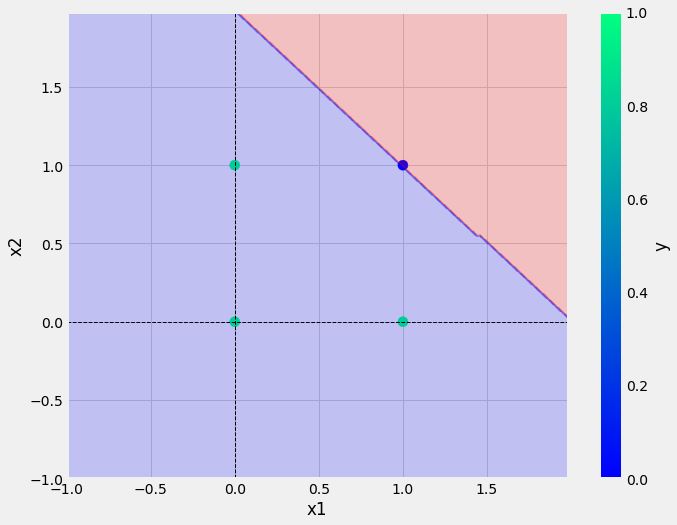

In [106]:
save_plot(df,"NAND.png",model_NAND)